In [1]:
pip install nltk

Note: you may need to restart the kernel to use updated packages.


In [2]:
# Importing libraries
import nltk
import numpy as np
import pandas as pd
import pprint, time
import random
from sklearn.model_selection import train_test_split
from nltk.tokenize import word_tokenize
import math

In [3]:
# reading the Treebank tagged sentences
import nltk.corpus.reader.tagged 
nltk.download('treebank')
t = list(nltk.corpus.treebank.tagged_sents())

[nltk_data] Downloading package treebank to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package treebank is already up-to-date!


In [4]:
# first few tagged sentences
print(t[:40])

[[('Pierre', 'NNP'), ('Vinken', 'NNP'), (',', ','), ('61', 'CD'), ('years', 'NNS'), ('old', 'JJ'), (',', ','), ('will', 'MD'), ('join', 'VB'), ('the', 'DT'), ('board', 'NN'), ('as', 'IN'), ('a', 'DT'), ('nonexecutive', 'JJ'), ('director', 'NN'), ('Nov.', 'NNP'), ('29', 'CD'), ('.', '.')], [('Mr.', 'NNP'), ('Vinken', 'NNP'), ('is', 'VBZ'), ('chairman', 'NN'), ('of', 'IN'), ('Elsevier', 'NNP'), ('N.V.', 'NNP'), (',', ','), ('the', 'DT'), ('Dutch', 'NNP'), ('publishing', 'VBG'), ('group', 'NN'), ('.', '.')], [('Rudolph', 'NNP'), ('Agnew', 'NNP'), (',', ','), ('55', 'CD'), ('years', 'NNS'), ('old', 'JJ'), ('and', 'CC'), ('former', 'JJ'), ('chairman', 'NN'), ('of', 'IN'), ('Consolidated', 'NNP'), ('Gold', 'NNP'), ('Fields', 'NNP'), ('PLC', 'NNP'), (',', ','), ('was', 'VBD'), ('named', 'VBN'), ('*-1', '-NONE-'), ('a', 'DT'), ('nonexecutive', 'JJ'), ('director', 'NN'), ('of', 'IN'), ('this', 'DT'), ('British', 'JJ'), ('industrial', 'JJ'), ('conglomerate', 'NN'), ('.', '.')], [('A', 'DT'), ('f

Output shows that each word in the sentence is tagged with its corresponding POS tag.

In [5]:
# Splitting into train and test
random.seed(1234)
train_set, test_set = train_test_split(t,test_size=0.3)
print(len(train_set))
print(len(test_set))
print(train_set[:40])

2739
1175
[[('So', 'IN'), ('far', 'RB'), (',', ','), ('they', 'PRP'), ('said', 'VBD'), ('0', '-NONE-'), ('*T*-2', '-NONE-'), (',', ','), ('investors', 'NNS'), ('appear', 'VBP'), ('unenthusiastic', 'JJ'), ('about', 'IN'), ('the', 'DT'), ('new', 'JJ'), ('issue', 'NN'), ('which', 'WDT'), ('*T*-1', '-NONE-'), ('might', 'MD'), ('force', 'VB'), ('the', 'DT'), ('government', 'NN'), ('to', 'TO'), ('raise', 'VB'), ('the', 'DT'), ('coupon', 'NN'), ('to', 'TO'), ('more', 'JJR'), ('than', 'IN'), ('7', 'CD'), ('%', 'NN'), ('.', '.')], [('The', 'DT'), ('others', 'NNS'), ('here', 'RB'), ('today', 'NN'), ('live', 'VBP'), ('elsewhere', 'RB'), ('.', '.')], [('The', 'DT'), ('one', 'CD'), ('character', 'NN'), ('at', 'IN'), ('least', 'JJS'), ('somewhat', 'RB'), ('interesting', 'JJ'), ('was', 'VBD'), ('Irving', 'NNP'), ('Louis', 'NNP'), ('Lobsenz', 'NNP'), (',', ','), ('a', 'DT'), ('pediatrician', 'NN'), ('who', 'WP'), ('*T*-1', '-NONE-'), ('changed', 'VBD'), ('his', 'PRP$'), ('name', 'NN'), ('to', 'TO'), (

In [6]:
# Getting list of tagged words
train_tagged_words = [tup for sent in train_set for tup in sent]
len(train_tagged_words)

69994

In [7]:
# tokens 
tokens = [pair[0] for pair in train_tagged_words]
# vocabulary
V = set(tokens)
print("Total vocabularies: ",len(V))
# number of tags
T = set([pair[1] for pair in train_tagged_words])
print("Total tags: ",len(T))

Total vocabularies:  10149
Total tags:  45


In [8]:
#Emission Probabilities
# computing P(w/t) and storing in T x V matrix
t = len(T)
v = len(V)
w_given_t = np.zeros((t, v))
# compute word given tag: Emission Probability
def word_given_tag(word, tag, train_bag = train_tagged_words):
    tag_list = [pair for pair in train_bag if pair[1]==tag]
    count_tag = len(tag_list)
    w_given_tag_list = [pair[0] for pair in tag_list if pair[0]==word]
    count_w_given_tag = len(w_given_tag_list)
    
    return (count_w_given_tag, count_tag)

In [9]:
# examples
# large
print("\n", "large")
print(word_given_tag('large', 'JJ'))
print(word_given_tag('large', 'VB'))
print(word_given_tag('large', 'NN'), "\n")
# will
print("\n", "will")
print(word_given_tag('will', 'MD'))
print(word_given_tag('will', 'NN'))
print(word_given_tag('will', 'VB'))
# book
print("\n", "book")
print(word_given_tag('book', 'NN'))
print(word_given_tag('book', 'VB'))


 large
(22, 4114)
(0, 1765)
(0, 9118) 


 will
(186, 646)
(1, 9118)
(0, 1765)

 book
(5, 9118)
(1, 1765)


In [10]:
# compute tag given tag: tag2(t2) given tag1 (t1), i.e. Transition Probability
def t2_given_t1(t2, t1, train_bag = train_tagged_words):
    tags = [pair[1] for pair in train_bag]
    count_t1 = len([t for t in tags if t==t1])
    count_t2_t1 = 0
    for index in range(len(tags)-1):
        if tags[index]==t1 and tags[index+1] == t2:
            count_t2_t1 += 1
    return (count_t2_t1, count_t1)

In [11]:
# examples
print(t2_given_t1(t2='NNP', t1='JJ'))
print(t2_given_t1('NN', 'JJ'))
print(t2_given_t1('NN', 'DT'))
print(t2_given_t1('NNP', 'VB'))
print(t2_given_t1(',', 'NNP'))
print(t2_given_t1('PRP', 'PRP'))
print(t2_given_t1('VBG', 'NNP'))

(132, 4114)
(1846, 4114)
(2628, 5688)
(49, 1765)
(1019, 6604)
(2, 1208)
(3, 6604)


In [12]:
#Please note P(tag|start) is same as P(tag|'.')
print(t2_given_t1('DT', '.'))
print(t2_given_t1('VBG', '.'))
print(t2_given_t1('NN', '.'))
print(t2_given_t1('NNP', '.'))

(573, 2702)
(7, 2702)
(111, 2702)
(517, 2702)


In [13]:
# creating t x t transition matrix of tags
# each column is t2, each row is t1
# thus M(i, j) represents P(tj given ti)
tags_matrix = np.zeros((len(T), len(T)), dtype='float32')
for i, t1 in enumerate(list(T)):
    for j, t2 in enumerate(list(T)): 
        tags_matrix[i, j] = t2_given_t1(t2, t1)[0]/t2_given_t1(t2, t1)[1]
tags_matrix

array([[0.0000000e+00, 0.0000000e+00, 7.7777781e-02, ..., 1.1111111e-02,
        2.2222223e-02, 1.6666667e-01],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 1.0195165e-03, 1.7186135e-02, ..., 3.1168075e-02,
        2.9129043e-04, 1.4564522e-04],
       ...,
       [8.2781457e-04, 0.0000000e+00, 3.1456955e-02, ..., 1.6556291e-03,
        1.8377483e-01, 3.3112583e-03],
       [0.0000000e+00, 6.8073522e-04, 9.1899253e-02, ..., 1.2933969e-02,
        6.8073522e-04, 4.7651464e-03],
       [0.0000000e+00, 2.4213076e-03, 8.4745765e-02, ..., 2.6634382e-02,
        1.4527845e-02, 0.0000000e+00]], dtype=float32)

In [14]:
# convert the matrix to a df for better readability
tags_df = pd.DataFrame(tags_matrix, columns = list(T), index=list(T))
tags_df

,-RRB-,PDT,IN,JJ,RBS,WDT,PRP$,WP$,NN,RB,...,RBR,VB,-NONE-,'',POS,UH,CD,PRP,VBZ,:
-RRB-,0.000000,0.000000,0.077778,0.022222,0.000000,0.011111,0.000000,0.000000,0.055556,0.055556,...,0.000000,0.000000,0.022222,0.000000,0.000000,0.000000,0.011111,0.011111,0.022222,0.166667
PDT,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.105263,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
IN,0.000000,0.001020,0.017186,0.094378,0.000000,0.003787,0.032625,0.000146,0.112729,0.012089,...,0.000728,0.000146,0.034372,0.000000,0.000000,0.000000,0.061025,0.031168,0.000291,0.000146
JJ,0.000243,0.000000,0.056393,0.065873,0.000000,0.000000,0.000000,0.000000,0.448712,0.003160,...,0.000243,0.000000,0.020904,0.004375,0.000000,0.000000,0.019446,0.000486,0.001215,0.002431
RBS,0.000000,0.000000,0.038462,0.769231,0.000000,0.000000,0.000000,0.000000,0.000000,0.153846,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
WDT,0.000000,0.000000,0.006579,0.016447,0.000000,0.000000,0.000000,0.000000,0.009868,0.003289,...,0.000000,0.000000,0.842105,0.000000,0.000000,0.000000,0.006579,0.036184,0.003289,0.003289
PRP$,0.000000,0.000000,0.000000,0.224953,0.001890,0.000000,0.000000,0.000000,0.427221,0.001890,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.026465,0.000000,0.001890,0.000000
WP$,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.428571,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
NN,0.002084,0.000000,0.243694,0.009103,0.000000,0.008555,0.000110,0.000000,0.124698,0.016232,...,0.000329,0.000987,0.040250,0.005813,0.020180,0.000000,0.006032,0.001535,0.045295,0.014367
RB,0.000000,0.000509,0.111055,0.090678,0.000000,0.002038,0.000509,0.000000,0.015792,0.072338,...,0.007132,0.102904,0.023434,0.001019,0.000000,0.000000,0.030565,0.003566,0.042282,0.006623


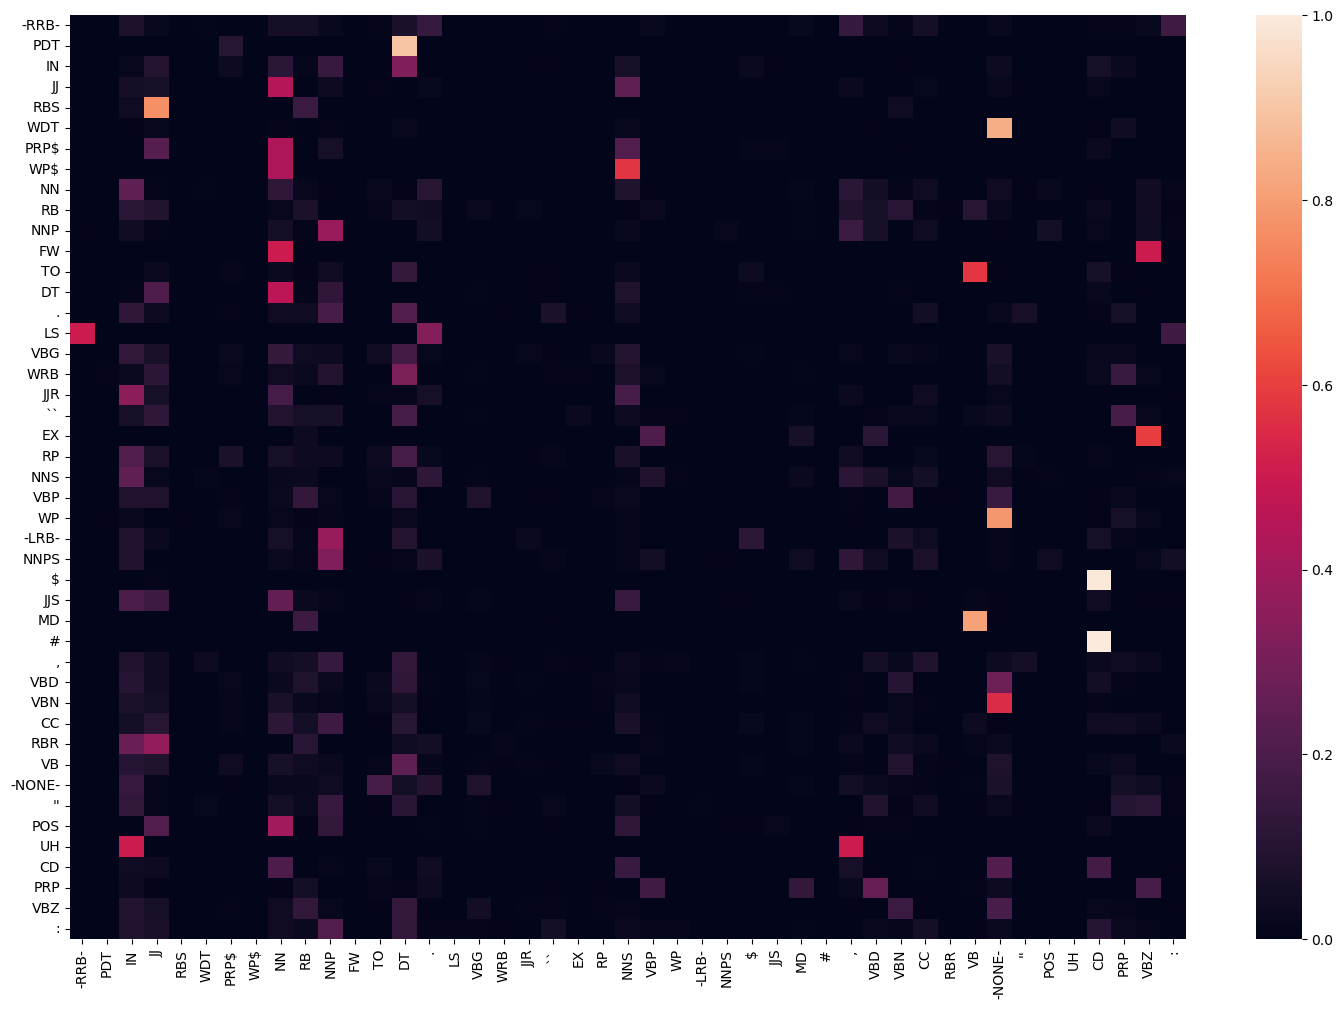

In [15]:
# heatmap of tags matrix
# T(i, j) means P(tag j given tag i)
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(18, 12))
sns.heatmap(tags_df)
plt.show()

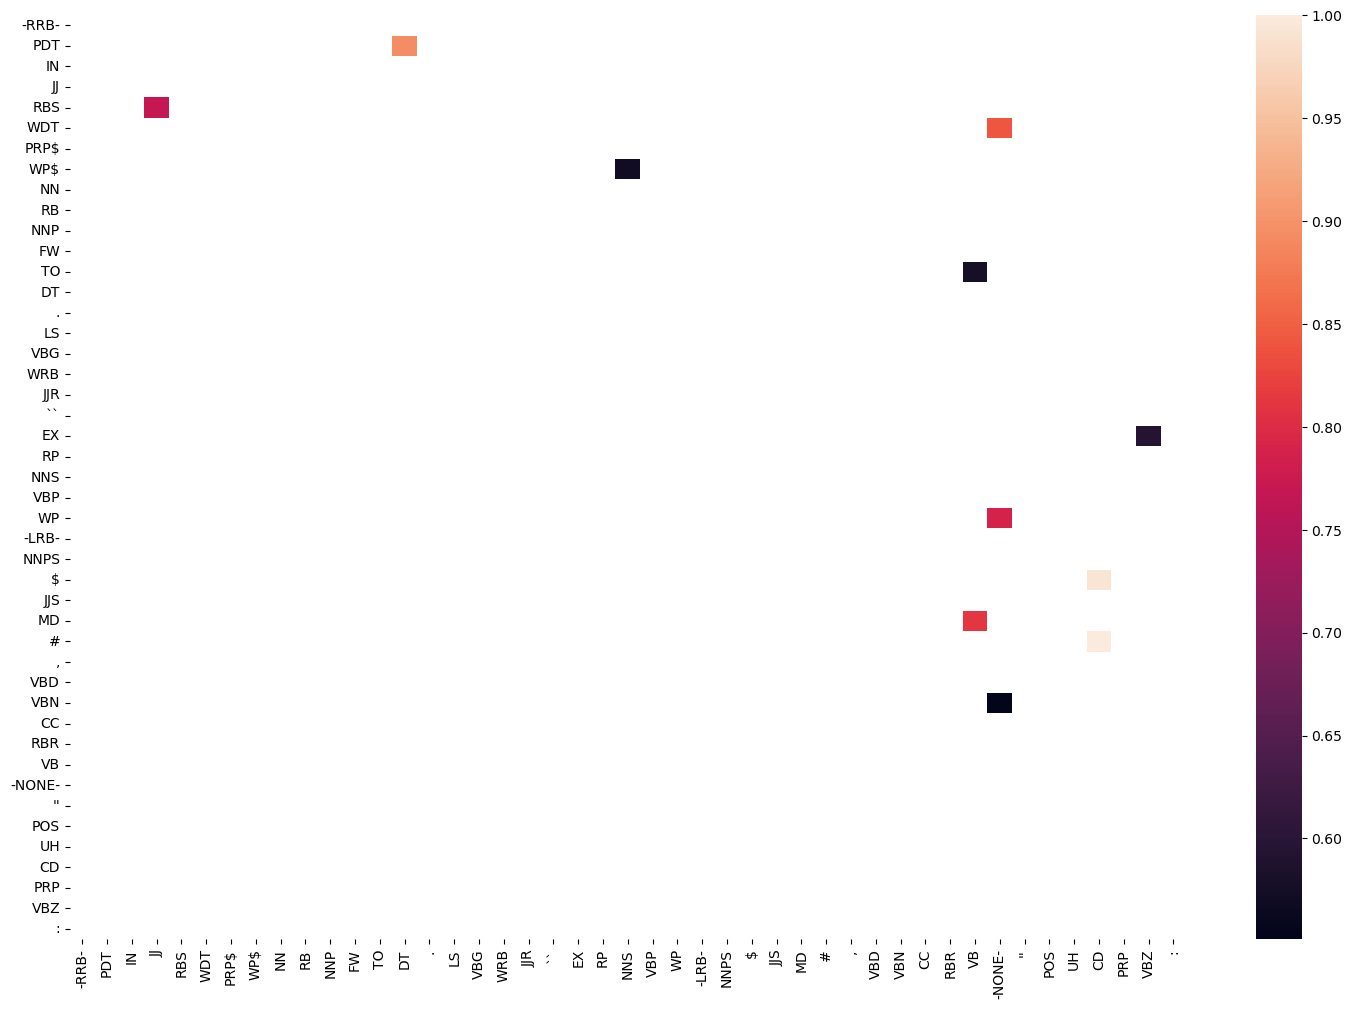

['-RRB-',
 'PDT',
 'IN',
 'JJ',
 'RBS',
 'WDT',
 'PRP$',
 'WP$',
 'NN',
 'RB',
 'NNP',
 'FW',
 'TO',
 'DT',
 '.',
 'LS',
 'VBG',
 'WRB',
 'JJR',
 '``',
 'EX',
 'RP',
 'NNS',
 'VBP',
 'WP',
 '-LRB-',
 'NNPS',
 '$',
 'JJS',
 'MD',
 '#',
 ',',
 'VBD',
 'VBN',
 'CC',
 'RBR',
 'VB',
 '-NONE-',
 "''",
 'POS',
 'UH',
 'CD',
 'PRP',
 'VBZ',
 ':']

In [16]:
#finding frequent tags
# filter the df to get P(t2, t1) > 0.5
tags_frequent = tags_df[tags_df>0.5]
plt.figure(figsize=(18, 12))
sns.heatmap(tags_frequent)
plt.show()
list(tags_frequent)


In [17]:
# Viterbi Algorithm
def Viterbi(words, train_bag = train_tagged_words):
    state = []
    T = list(set([pair[1] for pair in train_bag]))
    
    for key, word in enumerate(words):
        #initialise list of probability column for a given observation
        p = [] 
        for tag in T:
            if key == 0:
                transition_p = tags_df.loc['.', tag]
            else:
                transition_p = tags_df.loc[state[-1], tag]
                
            # compute emission and state probabilities
            emission_p = word_given_tag(words[key], tag)[0]/word_given_tag(words[key], tag)[1]
            state_probability = emission_p * transition_p    
            p.append(state_probability)
            
        pmax = max(p)
        # getting state for which probability is maximum
        state_max = T[p.index(pmax)] 
        state.append(state_max)
    return list(zip(words, state))

In [25]:
# Running on entire test dataset would take more than 3-4hrs. 
# Let's test our Viterbi algorithm on a few sample sentences of test dataset
random.seed(1234)
# choose random 20 sents
rndom = [random.randint(1,len(test_set)) for x in range(20)]
# list of sents
test_run = [test_set[i] for i in rndom]
# list of tagged words
test_run_base = [tup for sent in test_run for tup in sent]
# list of untagged words
test_tagged_words = [tup[0] for sent in test_run for tup in sent]
test_run

[[('A', 'DT'),
  ('spokesman', 'NN'),
  ('for', 'IN'),
  ('Temple', 'NNP'),
  ('estimated', 'VBD'),
  ('that', 'IN'),
  ('Sea', 'NNP'),
  ('Containers', 'NNPS'),
  ("'", 'POS'),
  ('plan', 'NN'),
  ('--', ':'),
  ('if', 'IN'),
  ('all', 'PDT'),
  ('the', 'DT'),
  ('asset', 'NN'),
  ('sales', 'NNS'),
  ('materialize', 'VBP'),
  ('--', ':'),
  ('would', 'MD'),
  ('result', 'VB'),
  ('in', 'IN'),
  ('shareholders', 'NNS'),
  ('receiving', 'VBG'),
  ('only', 'RB'),
  ('$', '$'),
  ('36', 'CD'),
  ('to', 'TO'),
  ('$', '$'),
  ('45', 'CD'),
  ('*U*', '-NONE-'),
  ('a', 'DT'),
  ('share', 'NN'),
  ('in', 'IN'),
  ('cash', 'NN'),
  ('.', '.')],
 [('Sony', 'NNP'),
  ("'s", 'POS'),
  ('planned', 'VBN'),
  ('acquisition', 'NN'),
  ('of', 'IN'),
  ('Guber\\/Peters', 'NNP'),
  ('Entertainment', 'NNP'),
  ('Co.', 'NNP'),
  ('for', 'IN'),
  ('$', '$'),
  ('200', 'CD'),
  ('million', 'CD'),
  ('*U*', '-NONE-'),
  ('is', 'VBZ'),
  ('scheduled', 'VBN'),
  ('*-1', '-NONE-'),
  ('to', 'TO'),
  ('close', 

In [26]:
# tagging the test sentences
start = time.time()
tagged_seq = Viterbi(test_tagged_words)
end = time.time()
difference = end-start
print("Time taken in seconds: ", difference)
print(tagged_seq)

Time taken in seconds:  1023.6484577655792
[('A', 'DT'), ('spokesman', 'NN'), ('for', 'IN'), ('Temple', 'NNP'), ('estimated', 'VBD'), ('that', 'IN'), ('Sea', 'NNP'), ('Containers', 'NNPS'), ("'", 'POS'), ('plan', 'NN'), ('--', ':'), ('if', 'IN'), ('all', 'DT'), ('the', 'DT'), ('asset', 'NN'), ('sales', 'NNS'), ('materialize', '-RRB-'), ('--', ':'), ('would', 'MD'), ('result', 'VB'), ('in', 'IN'), ('shareholders', 'NNS'), ('receiving', 'VBG'), ('only', 'RB'), ('$', '$'), ('36', '-RRB-'), ('to', 'TO'), ('$', '$'), ('45', 'CD'), ('*U*', '-NONE-'), ('a', 'DT'), ('share', 'NN'), ('in', 'IN'), ('cash', 'NN'), ('.', '.'), ('Sony', 'NNP'), ("'s", 'POS'), ('planned', 'JJ'), ('acquisition', 'NN'), ('of', 'IN'), ('Guber\\/Peters', 'NNP'), ('Entertainment', 'NNP'), ('Co.', 'NNP'), ('for', 'IN'), ('$', '$'), ('200', 'CD'), ('million', 'CD'), ('*U*', '-NONE-'), ('is', 'VBZ'), ('scheduled', 'VBN'), ('*-1', '-NONE-'), ('to', 'TO'), ('close', 'VB'), ('Monday', 'NNP'), ('.', '.'), ('The', 'DT'), ('law',

In [27]:
# accuracy
check = [i for i, j in zip(tagged_seq, test_run_base) if i == j] 
accuracy = len(check)/len(tagged_seq)
print(accuracy)

0.8881469115191987


In [29]:
#sample size = 30 sents
rndom = [random.randint(1,len(test_set)) for x in range(30)]
# list of sents
test_run = [test_set[i] for i in rndom]
# list of tagged words
test_run_base = [tup for sent in test_run for tup in sent]
# list of untagged words
test_tagged_words = [tup[0] for sent in test_run for tup in sent]
test_run
# tagging the test sentences
start = time.time()
tagged_seq = Viterbi(test_tagged_words)
end = time.time()
difference = end-start
print("Time taken in seconds: ", difference)
print(tagged_seq)
# accuracy
check = [i for i, j in zip(tagged_seq, test_run_base) if i == j] 
accuracy = len(check)/len(tagged_seq)
print(accuracy)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


[('Twitter', '-RRB-'), ('is', 'VBZ'), ('the', 'DT'), ('best', 'JJS'), ('networking', 'NN'), ('social', 'JJ'), ('site', '-RRB-'), ('.', '.'), ('Man', 'NNP'), ('is', 'VBZ'), ('a', 'DT'), ('social', 'JJ'), ('animal', '-RRB-'), ('.', '.'), ('Data', 'NNP'), ('science', 'NN'), ('is', 'VBZ'), ('an', 'DT'), ('emerging', 'VBG'), ('field', 'NN'), ('.', '.'), ('Data', 'NNP'), ('science', 'NN'), ('jobs', 'NNS'), ('are', 'VBP'), ('high', 'JJ'), ('in', 'IN'), ('demand', 'NN'), ('.', '.')]


In [ ]:
sample sents = 45
rndom = [random.randint(1,len(test_set)) for x in range(40)]
# list of sents
test_run = [test_set[i] for i in rndom]
# list of tagged words
test_run_base = [tup for sent in test_run for tup in sent]
# list of untagged words
test_tagged_words = [tup[0] for sent in test_run for tup in sent]
test_run
# tagging the test sentences
start = time.time()
tagged_seq = Viterbi(test_tagged_words)
end = time.time()
difference = end-start
print("Time taken in seconds: ", difference)
print(tagged_seq)
# accuracy
check = [i for i, j in zip(tagged_seq, test_run_base) if i == j] 
accuracy = len(check)/len(tagged_seq)
print(accuracy)